<a href="https://colab.research.google.com/github/chonholee/tutorial/blob/main/bigdata/BigDataII_15_QA_NQueen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dwave-ocean-sdk

# 例３：量子アニーリングでN-Queen問題を解く

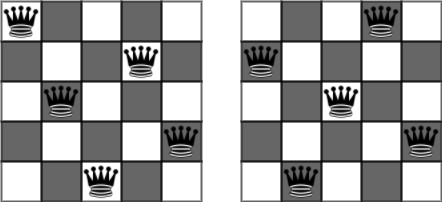

## 縦・横・斜めにQueenが並ばないような配置（組み合わせ）

## 目的関数（エネルギー）＝　コスト関数　＋　制約関数

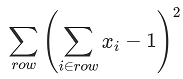

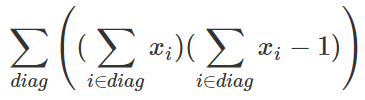

In [ ]:
import numpy as np
from pyqubo import Array, Constraint, Placeholder

N = 4

x = Array.create('x', shape=(N,N), vartype='BINARY')

cost = 0

constr_1 = 0
onstr_1 = 0
for i in range(N):
  constr_1 += (sum(x[i])-1)**2

constr_2 = 0
constr_2 = 0
for i in range(N):
  constr_2 += (sum(x.T[i])-1)**2

constr_3 = 0
xi = 0
xi_1 = 0
for k in range(-N+1,N):
    xi += (sum(i for i in np.diag(x,k=k)))
    xi_1 += (sum(i for i in np.diag(x,k=k))) -1 
    constr_3 += xi * xi_1
    
constr_4 = 0
xi = 0
xi_1 = 0
for k in range(-N+1,N):
    xi += (sum(i for i in np.diag(np.fliplr(x),k=k)))
    xi_1 += (sum(i for i in np.diag(np.fliplr(x),k=k))) -1 
    constr_4 += xi * xi_1

In [ ]:
np.diag(x, k=0)

In [ ]:
cost_func = cost + Placeholder('lam') * Constraint(constr_1, label='constr_1') \
                 + Placeholder('lam2') * Constraint(constr_2, label='constr_2') \
                 + Placeholder('lam3') * Constraint(constr_3, label='constr_3') \
                 + Placeholder('lam3') * Constraint(constr_4, label='constr_4')

model = cost_func.compile()


### 目的関数をQUBO形式（量子マシンで動かせる形式）に変換してくれる

In [ ]:
feed_dict = {'lam': 10.0, 'lam2':10.0, 'lam3':1.0}
qubo, offset = model.to_qubo(feed_dict=feed_dict)

# DWaveSampler

**Dwaveマシンで実行**

Dwave Leap

※TokenはDwaveのDashboradから取得する


In [ ]:
token = '**' # DWave Leap Token
endpoint = 'https://cloud.dwavesys.com/sapi/'

In [ ]:
from dwave.system import DWaveSampler, EmbeddingComposite

dw_sampler = DWaveSampler(solver='DW_2000Q_6', token=token, endpoint=endpoint)

In [ ]:
sampler = EmbeddingComposite(dw_sampler)

In [ ]:
sampleset = sampler.sample_qubo(qubo, num_reads=10)

**結果を表示**

In [ ]:
sampleset.record

**結果を問題の解答として解釈**

In [ ]:
sampleset.record[0][0].reshape(N,N)